# ML Homework 2023
Valentina Margiotta (225401) 
Sara Resta (225418)

In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Generic libraries
import seaborn as sns
import pandas as pd
import numpy as np

# To visualize the data
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Regression and classification models
import sklearn
import scipy
from scipy.stats import t
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# cross validation
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.pipeline import Pipeline

# correlation test
from scipy.stats import chi2_contingency, f_oneway, spearmanr

from sklearn.feature_selection import VarianceThreshold, RFECV
from sklearn.dummy import DummyRegressor

Importing the datasets. We have three datasets:
- online_shoppers: the complete dataset
- training_set: subset of online_shoppers used for training
- test_set: subset of online_shoppers used for test

In [2]:
training_set_complete = pd.read_csv("data/training_set_online_shoppers_intention.csv")
test_set = pd.read_csv("data/test_set_online_shoppers_intention.csv")

## 1. PRELIMINARY ANALYSIS AND REGRESSION ALGORITHMS

For this first exercise we use the training set, which is composed of 9248 rows and 19 columns. Columns are dataset attributes and include both categorical and numerical variables.
* 9 numerical variables + "ExitRates"
* 7 categorical variables + "Revenue"
* 1 useless variable, "Unnamed: 0"

In [3]:
training_set_complete = training_set_complete.drop(columns=['Unnamed: 0'])
training_set = training_set_complete
print(training_set_complete.shape)
training_set_complete.head()

(9248, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,5,19.000000,0.000000,0.080000,0.000000,0.6,May,2,2,1,3,Returning_Visitor,False,False
1,5,158.700000,0,0.0,51,1364.266667,0.007692,0.011987,0.000000,0.0,Nov,3,2,3,2,Returning_Visitor,True,False
2,7,87.916667,1,0.0,46,1621.025379,0.004082,0.020544,6.023523,0.0,Dec,1,1,3,2,Returning_Visitor,False,False
3,1,4.000000,0,0.0,37,1296.942857,0.013889,NaN,0.000000,0.8,May,2,2,4,2,Returning_Visitor,False,False
4,2,132.400000,0,0.0,11,296.300000,0.000000,NaN,0.000000,0.0,Sep,2,4,3,2,New_Visitor,False,False


Assign "categorical" to type of categorical variables.

In [4]:
training_set_complete['Month']=training_set_complete['Month'].astype('category')
training_set_complete['OperatingSystems']=training_set_complete['OperatingSystems'].astype('category')
training_set_complete['Browser']=training_set_complete['Browser'].astype('category')
training_set_complete['Region']=training_set_complete['Region'].astype('category')
training_set_complete['TrafficType']=training_set_complete['TrafficType'].astype('category')
training_set_complete['VisitorType']=training_set_complete['VisitorType'].astype('category')
training_set_complete['Weekend']=training_set_complete['Weekend'].astype('category')
training_set_complete['Revenue']=training_set_complete['Revenue'].astype('category')

In [5]:
all_categories_browser = list(range(1,14))
all_categories_traffic_type = list(range(1,21))
training_set_complete['Browser'] = training_set_complete['Browser'].cat.set_categories(all_categories_browser)
training_set_complete['TrafficType'] = training_set_complete['TrafficType'].cat.set_categories(all_categories_traffic_type)

training_set_complete = pd.get_dummies(training_set_complete, columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend'], drop_first=False)
missing_values = training_set_complete[training_set_complete['ExitRates'].isna()]

training_set_reg = training_set_complete[training_set_complete['ExitRates'].isna()==False]

Assign a chronological order to "Month" variable.

In [6]:
month_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_order = pd.Categorical(training_set['Month'], categories=month_order, ordered=True)
training_set['Month'] = month_order.sort_values()

Creation of two objects, one containing all the categorical variables and one containing the numerical ones.

In [7]:
df_cat = pd.DataFrame({'Month':training_set['Month'],
                       'OperatingSystems':training_set['OperatingSystems'],
                       'Browser':training_set['Browser'],
                       'Region':training_set['Region'],
                       'TrafficType':training_set['TrafficType'],
                       'VisitorType':training_set['VisitorType'],
                       'Weekend':training_set['Weekend'],
                       'Revenue':training_set['Revenue']})
df_num = pd.DataFrame({'Administrative':training_set['Administrative'],
                   'Administrative_Duration':training_set['Administrative_Duration'],
                   'Informational':training_set['Informational'],
                   'Informational_Duration':training_set['Informational_Duration'],
                   'ProductRelated':training_set['ProductRelated'], 
                   'ProductRelated_Duration':training_set['ProductRelated_Duration'],
                   'BounceRates':training_set['BounceRates'], 
                   'ExitRates':training_set['ExitRates'],
                   'PageValues':training_set['PageValues'], 
                   'SpecialDay':training_set['SpecialDay']})

## 1.1 Dataset inspection

We check if there's any NA value and we see there aren't NA vlaues.

In [8]:
# Check for NA values
np.sum(training_set.isna())

Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                   0
ExitRates                  2782
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
VisitorType                   0
Weekend                       0
Revenue                       0
dtype: int64

We drop rows with NA in the "ExitRates" column

In [9]:
training_set = training_set[training_set['ExitRates'].isna()==False]
df_num = df_num[df_num['ExitRates'].isna()==False]
print(training_set.shape) # 9248 - 2782 = 6466
np.sum(training_set.isna())

(6466, 18)


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
df_cat.describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,9248,9248,9248,9248,9248,9248,9248,9248
unique,10,8,12,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,2530,4949,5973,3581,2974,7893,7126,7807


In [11]:
df_num.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000
mean,2.286576,78.764519,0.500309,34.265697,31.608877,1184.319193,0.021911,0.042791,5.866036,0.061274
std,3.285393,168.883876,1.243980,134.169156,43.760806,1769.932298,0.047998,0.048164,18.574180,0.198339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.412500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,594.358333,0.003125,0.025000,0.000000,0.000000
75%,4.000000,89.995000,0.000000,0.000000,37.000000,1470.523958,0.016667,0.050000,0.000000,0.000000
max,27.000000,2720.500000,12.000000,2195.300000,584.000000,24844.156200,0.200000,0.200000,361.763742,1.000000


We do some visual inspection on categorical variables.

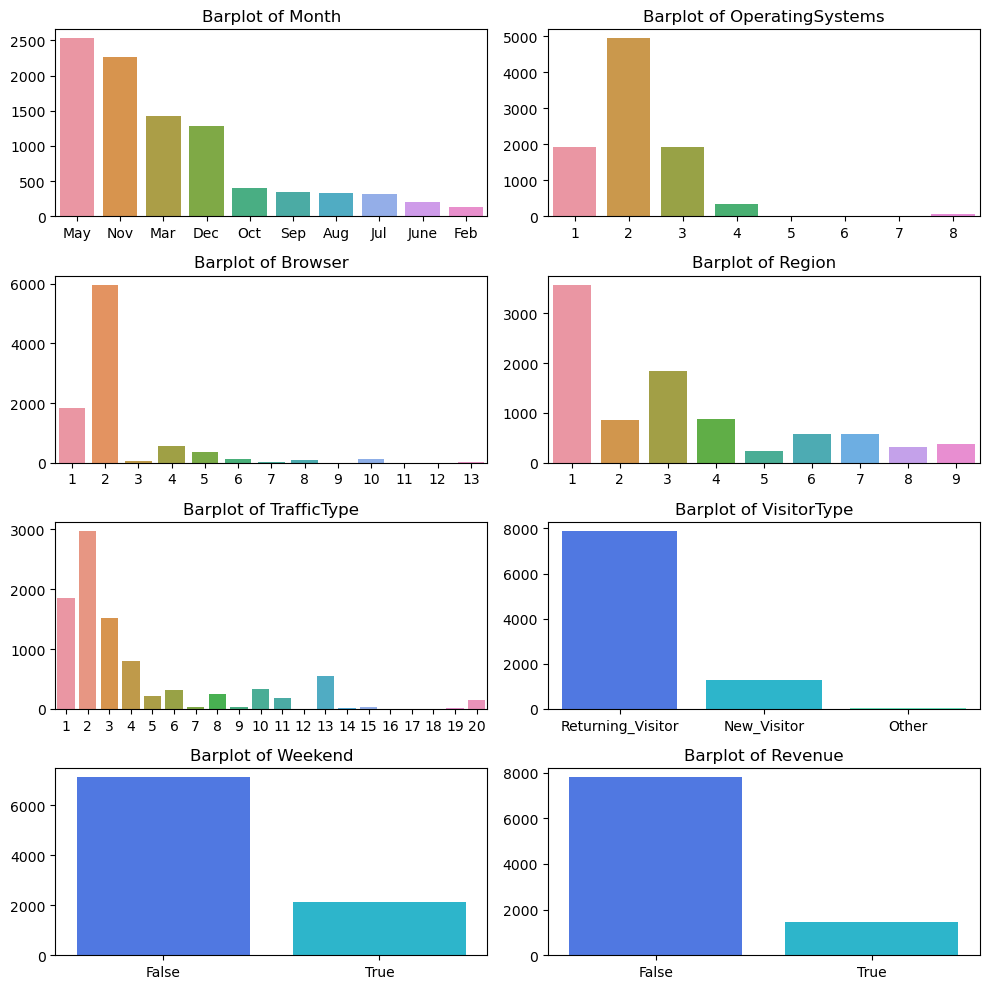

In [12]:
sns.set_palette("rainbow")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

for cat in enumerate(df_cat):
    i, cat = cat
    sns.barplot(x=list(df_cat["{}".format(cat)].value_counts().index), 
            y=list(df_cat["{}".format(cat)].value_counts().values), data=df_cat, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title("Barplot of {}".format(cat))

plt.tight_layout()
plt.show();

We do some inspection on numerical variables.

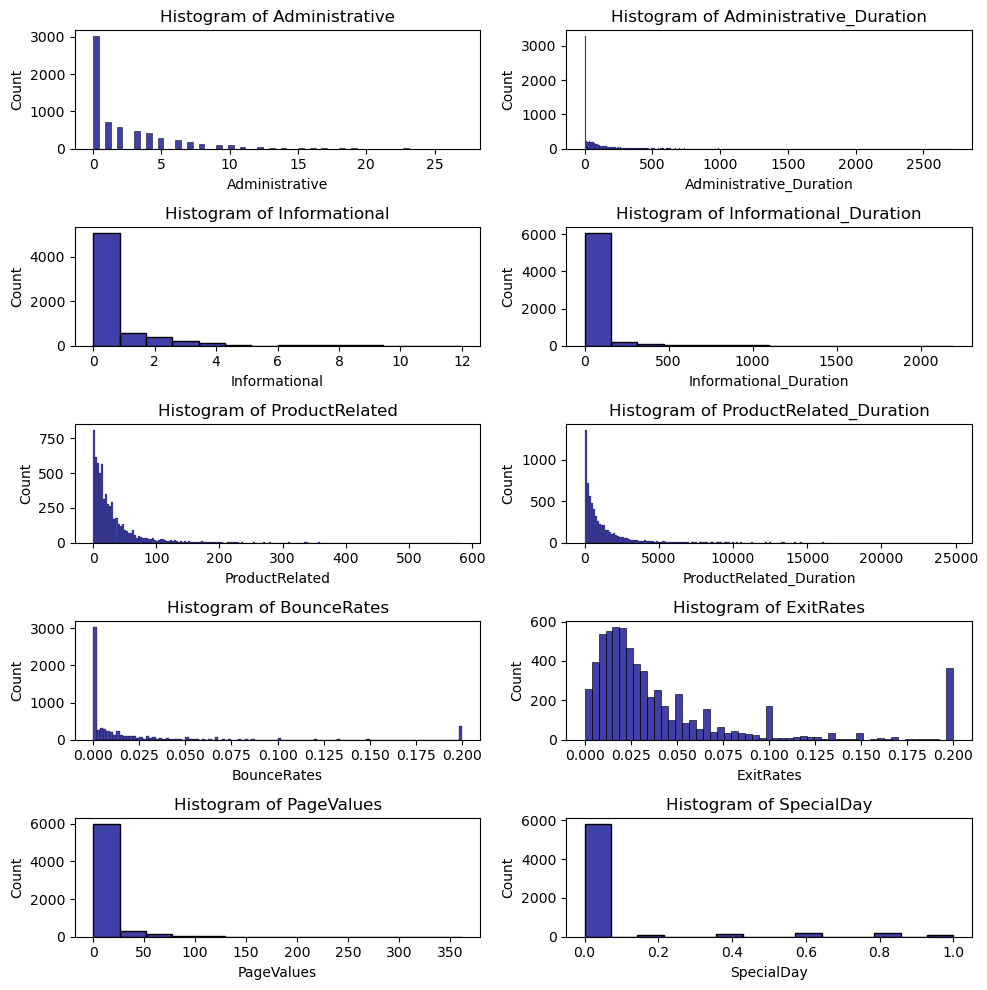

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))

for num in enumerate(df_num):
    i, num = num
    sns.histplot(data=df_num, x=num, ax=axes[i//2, i%2], color="darkblue")
    axes[i // 2, i % 2].set_title("Histogram of {}".format(num))

plt.tight_layout()
plt.show();

### Correlation

We want to know which are the most correlated variables with the target class and if there is any correlation between the variables.
We start considering if there is a correlation between some variables.

We firstly check if there is any correlation by printing the heatmap. The most correlated variables are:
* Administrative, Administrative_Duration
* Informational, Informational_Duration
* ProductRelated, ProductRelated_Duration
* BounceRates, ExitRates

<AxesSubplot:>

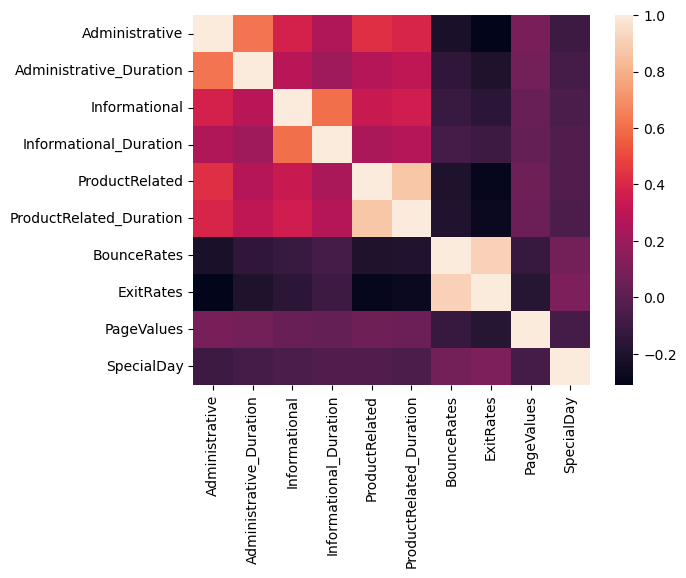

In [14]:
sns.heatmap(training_set.corr())

Now we print a scatterplot for the pairs of variables for which we found a correlation. From these scatterplots it seems that ProductRelated and ProductRelated_Duration have a linear relation, the same can be said for BouceRates and ExitRates.

Text(0, 0.5, 'ExitRates')

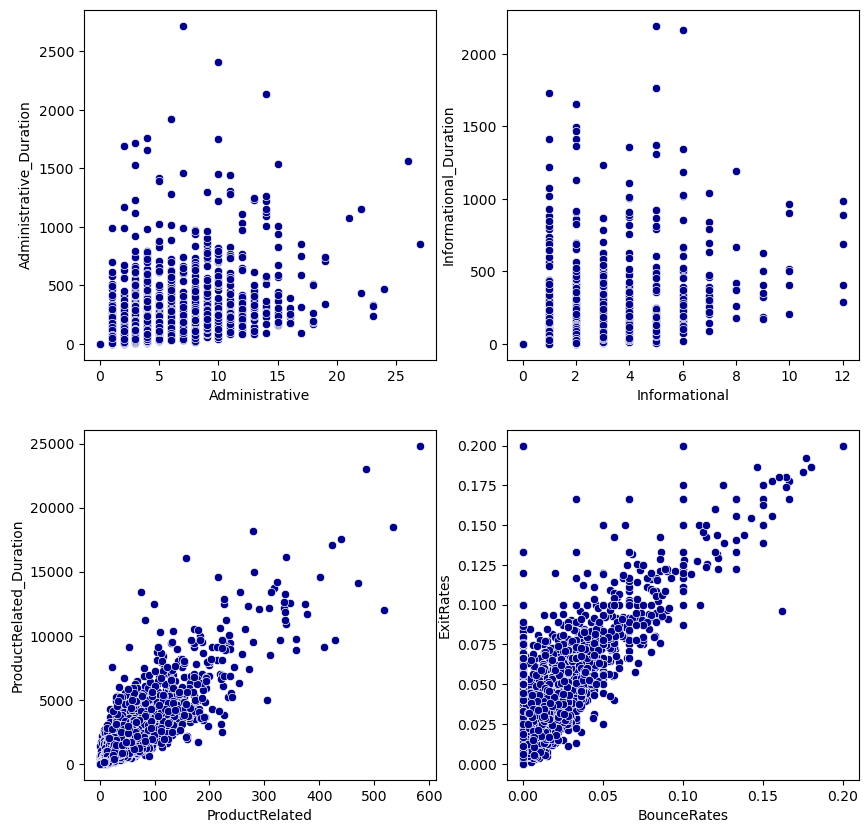

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(data=df_num, x=list(df_num['Administrative']), y=list(df_num['Administrative_Duration']), 
                ax = axes[0, 0], color='darkblue')
axes[0, 0].set_xlabel('Administrative')
axes[0, 0].set_ylabel('Administrative_Duration')

sns.scatterplot(data=df_num, x=list(df_num['Informational']), y=list(df_num['Informational_Duration']), 
                ax = axes[0, 1], color='darkblue')
axes[0, 1].set_xlabel('Informational')
axes[0, 1].set_ylabel('Informational_Duration')

sns.scatterplot(data=df_num, x=list(df_num['ProductRelated']), y=list(df_num['ProductRelated_Duration']), 
                ax = axes[1, 0], color='darkblue')
axes[1, 0].set_xlabel('ProductRelated')
axes[1, 0].set_ylabel('ProductRelated_Duration')

sns.scatterplot(data=df_num, x=list(df_num['BounceRates']), y=list(df_num['ExitRates']), 
                ax = axes[1, 1], color='darkblue')
axes[1, 1].set_xlabel('BounceRates')
axes[1, 1].set_ylabel('ExitRates')

We compute the covariance matrix for the continuous variables. Guardando questa matrice possiamo osservare valori numerici che indicano quanto è forte la correlazione tra le diverse variabili. Si osserva che "Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration" sembrano essere correlate tra loro e anche la variabile "PageValues" presenta dei valori di covarianza alti rispetto a queste variabili

In [16]:
cont = training_set[["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", 
                        "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]]
cov_matrix = np.cov(cont, rowvar=False)
cov_matrix = pd.DataFrame(cov_matrix, columns=cont.columns, index=cont.columns)
cov_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,10.793809,342.842941,1.550955,115.940720,61.627340,2.275884e+03,-0.034651,-0.049029,5.672001,-0.063255
Administrative_Duration,342.842941,28521.763416,60.571262,4731.749048,1994.072963,9.155185e+04,-1.163875,-1.684167,246.884818,-2.368477
Informational,1.550955,60.571262,1.547486,101.005169,18.361374,7.866018e+02,-0.006661,-0.009403,0.908592,-0.012068
Informational_Duration,115.940720,4731.749048,101.005169,18001.362419,1418.318802,6.538297e+04,-0.471462,-0.670823,74.755367,-0.938230
ProductRelated,61.627340,1994.072963,18.361374,1418.318802,1915.008175,6.761608e+04,-0.429875,-0.620550,44.194896,-0.330957
ProductRelated_Duration,2275.884296,91551.847686,786.601778,65382.973853,67616.077265,3.132660e+06,-16.702687,-22.988968,1745.924531,-15.777183
BounceRates,-0.034651,-1.163875,-0.006661,-0.471462,-0.429875,-1.670269e+01,0.002304,0.002110,-0.106482,0.000706
ExitRates,-0.049029,-1.684167,-0.009403,-0.670823,-0.620550,-2.298897e+01,0.002110,0.002320,-0.156677,0.001029
PageValues,5.672001,246.884818,0.908592,74.755367,44.194896,1.745925e+03,-0.106482,-0.156677,345.000168,-0.258242
SpecialDay,-0.063255,-2.368477,-0.012068,-0.938230,-0.330957,-1.577718e+01,0.000706,0.001029,-0.258242,0.039338


Visualizziamo le varianze.

In [17]:
variance = np.diag(cov_matrix)
variance = pd.DataFrame(variance, columns=["Variance"], index=cont.columns)
variance

,Variance
Administrative,1.079381e+01
Administrative_Duration,2.852176e+04
Informational,1.547486e+00
Informational_Duration,1.800136e+04
ProductRelated,1.915008e+03
ProductRelated_Duration,3.132660e+06
BounceRates,2.303834e-03
ExitRates,2.319749e-03
PageValues,3.450002e+02
SpecialDay,3.933845e-02


### Focus on the target variable: Revenue

First of all, we take a look at the relation between "Revenue" and categorical variables. By looking at the barplots, it seems that none of the categorical variables clearly influences the Revenue outcome. We plot also the revenue barplot in order to visualize the proportion between the two classes of this variable, which is unbalanced with a predomination of class 0.

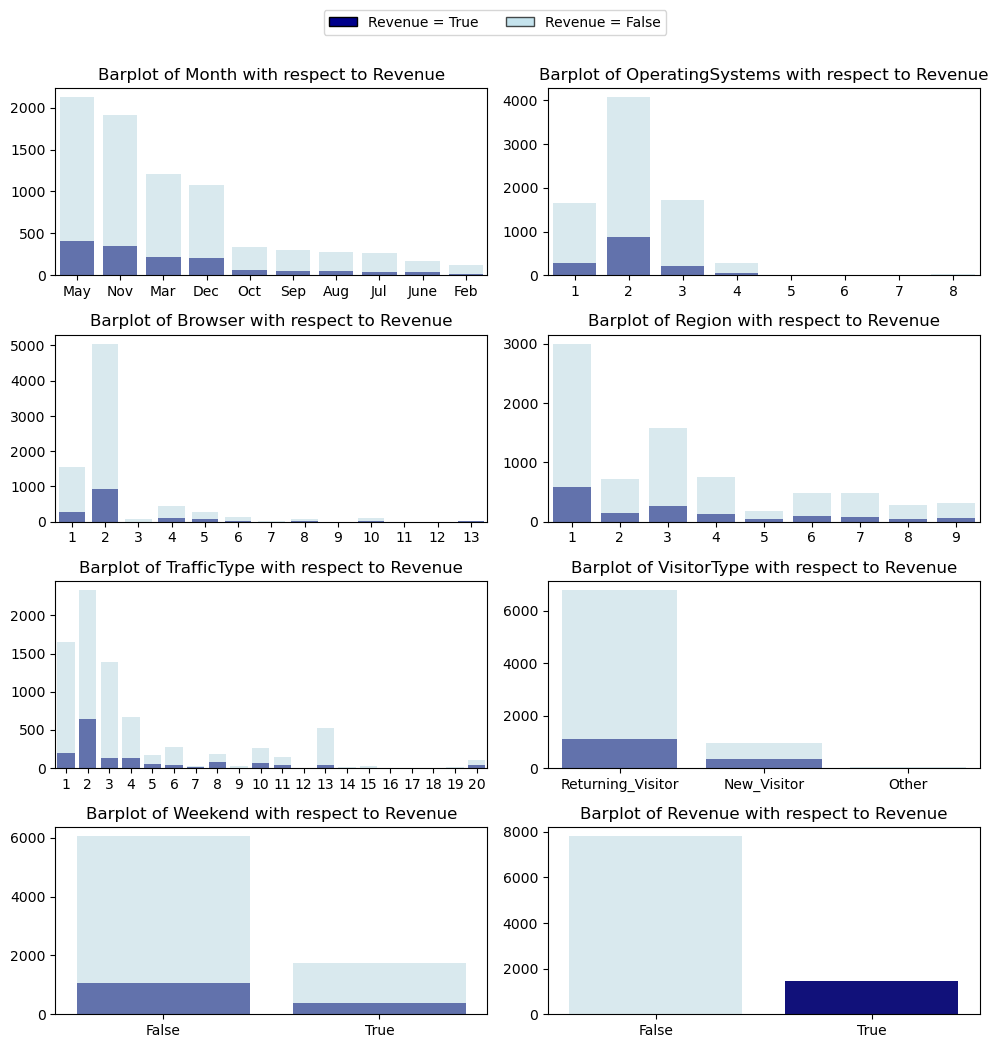

In [18]:
df_cat2 = df_cat.drop(columns=['Revenue'])

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

for cat in enumerate(df_cat):
    i, cat = cat
    sns.barplot(x=list(df_cat[df_cat["Revenue"]==1]["{}".format(cat)].value_counts().index), 
            y=list(df_cat[df_cat["Revenue"]==1]["{}".format(cat)].value_counts().values), data=df_cat, color="darkblue",
           ax=axes[i//2, i%2], label="Revenue 1")
    sns.barplot(x=list(df_cat[df_cat["Revenue"]==0]["{}".format(cat)].value_counts().index), 
            y=list(df_cat[df_cat["Revenue"]==0]["{}".format(cat)].value_counts().values), data=df_cat, color="lightblue", 
            ax=axes[i//2, i%2], label="Revenue 0", alpha=0.5)
    axes[i//2, i%2].set_title("Barplot of {} with respect to Revenue".format(cat))
    

legend_elements = [Patch(facecolor="darkblue", edgecolor="k", label="Revenue = True"),
                   Patch(facecolor="lightblue", edgecolor="k", alpha=0.7, label="Revenue = False")]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.tight_layout()
plt.show();

After the visual inspection, we apply a chi-squared test to have some numerical data (p values) about the correlation between "Revenue" and other categorical variables.

In [19]:
p_values = pd.DataFrame(columns=['Variable', 'p-value', 'p < 0.01'])
for cat in df_cat2:
    chi, p, df, expected = chi2_contingency(pd.crosstab(df_cat['Revenue'], df_cat[cat])) 
    if p < 0.01:
        asx = "**"
    else:
        asx = ""
    p_values = pd.concat([p_values, pd.DataFrame({'Variable': [cat], 'p-value': [p], 'p < 0.01': [asx]})], ignore_index=True)

p_values

,Variable,p-value,p < 0.01
0,Month,8.732781e-01,
1,OperatingSystems,5.649412e-10,**
2,Browser,3.277872e-03,**
3,Region,5.905850e-01,
4,TrafficType,1.220111e-50,**
5,VisitorType,9.597455e-26,**
6,Weekend,1.196902e-02,


Now, we compare "Revenue=1" and "Revenue=0" with respect to numerical variables, using boxplots. By looking at them, we see that some variables may influence more the "Revenue" response.

* Informational --> Revenue = 1
* ExitRates --> Revenue = 0
* PageValues --> Revenue = 1

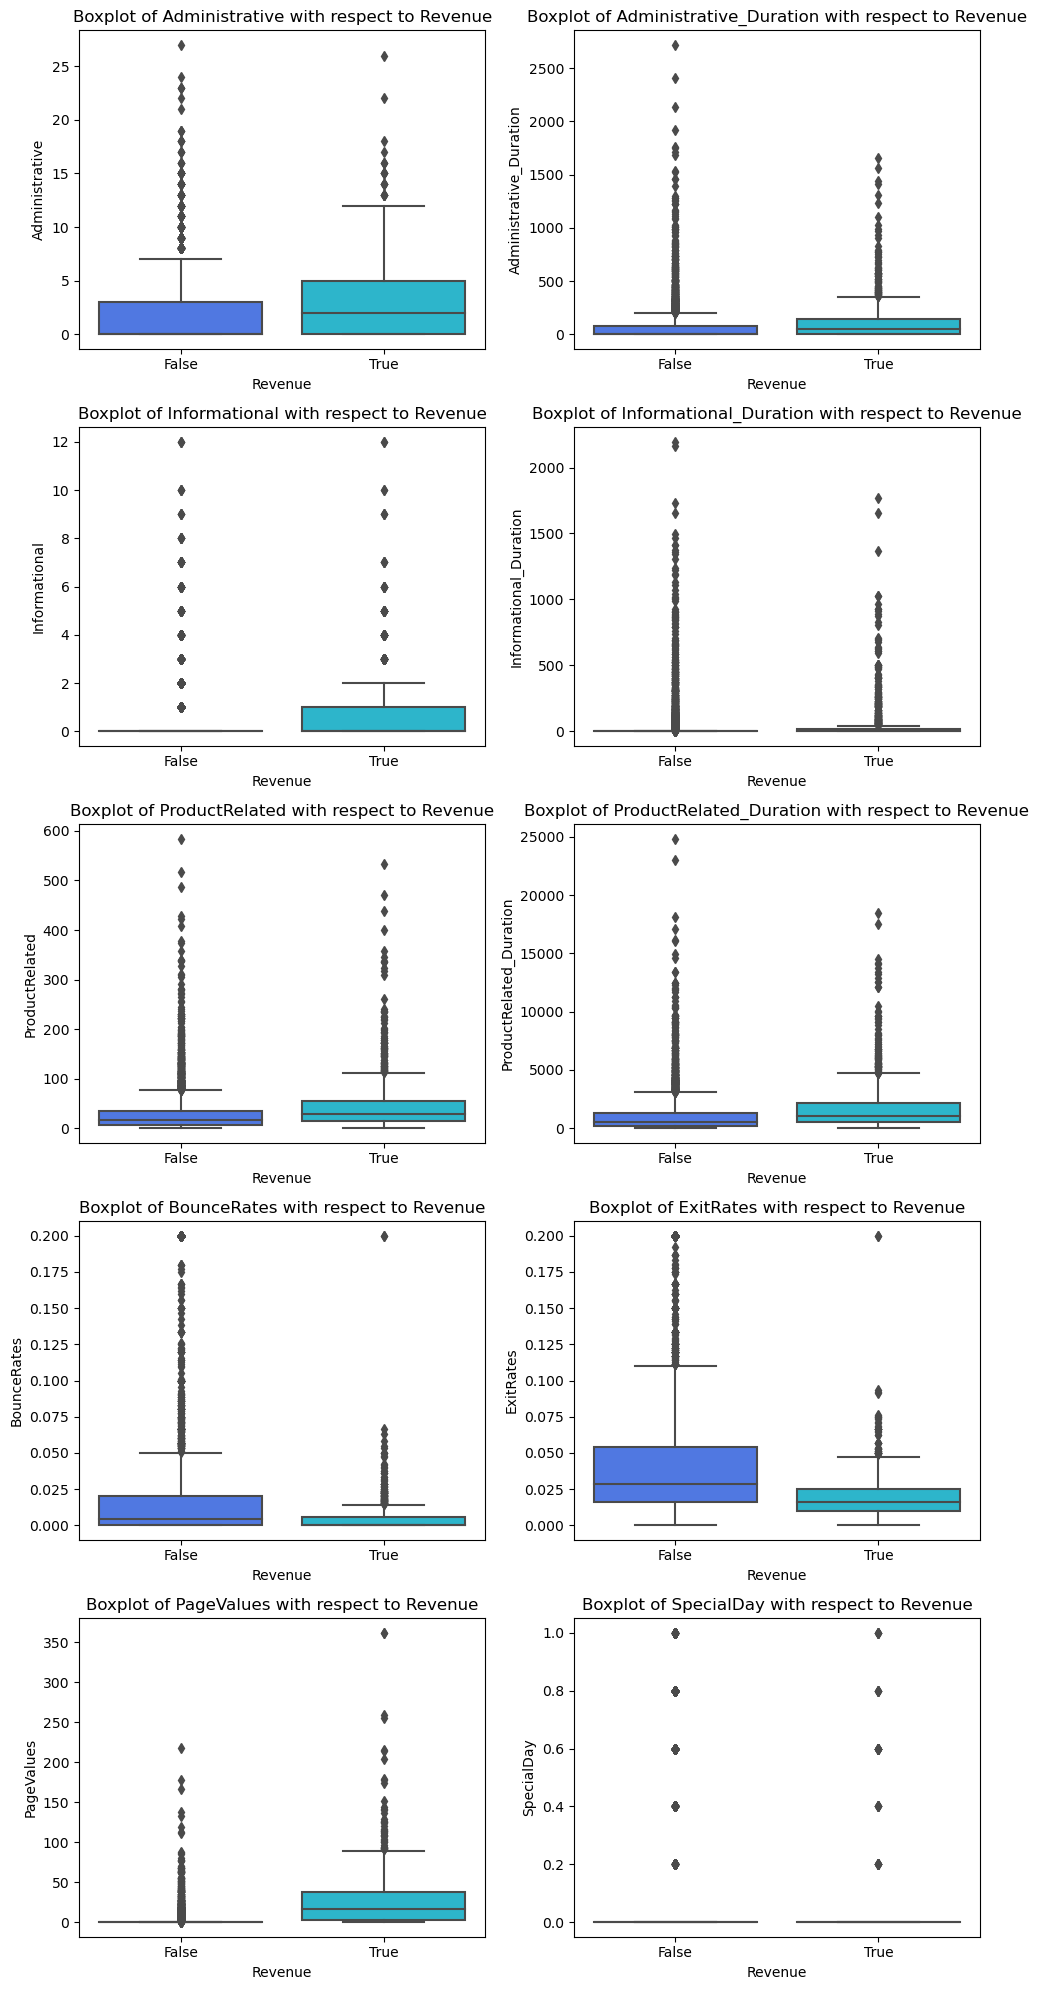

In [20]:
sns.set_palette("rainbow")
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

for num in enumerate(df_num):
    i, num = num
    sns.boxplot(x="Revenue", y="{}".format(num), data=training_set, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title("Boxplot of {} with respect to Revenue".format(num))

plt.tight_layout()
plt.show();

After the visual inspection, we apply an anova test to have some numerical data (p values) about the correlation between "Revenue" and the numerical variables.

In [21]:
p_values = pd.DataFrame(columns=['Variable', 'p-value', 'p < 0.01'])
for num in df_num:
    true = training_set[training_set['Revenue'] == 1][num]
    false = training_set[training_set['Revenue'] == 0][num]
    f_statistic, p = f_oneway(true, false)
    if p < 0.001:
        asx = "***"
    else:
        asx = ""
    p_values = pd.concat([p_values, pd.DataFrame({'Variable': [num], 'p-value': [p], 'p < 0.01': [asx]})], ignore_index=True)

p_values

,Variable,p-value,p < 0.01
0,Administrative,6.217574e-23,***
1,Administrative_Duration,4.993033e-14,***
2,Informational,2.022965e-13,***
3,Informational_Duration,4.846089e-07,***
4,ProductRelated,2.589077e-33,***
5,ProductRelated_Duration,5.808104e-36,***
6,BounceRates,1.705901e-34,***
7,ExitRates,3.391528e-64,***
8,PageValues,0.000000e+00,***
9,SpecialDay,7.453331e-13,***


### Focus on the target variable: ExitRates

The other variable that deserves a special treatment is "ExitRates", because some values (now removed) are missing and so the next step of our analysis will be to make a regression using the remaining variables in order to predict missing values of "ExitRates". We start by visualizing the influence of categorical variables on "ExitRates" through boxplots.

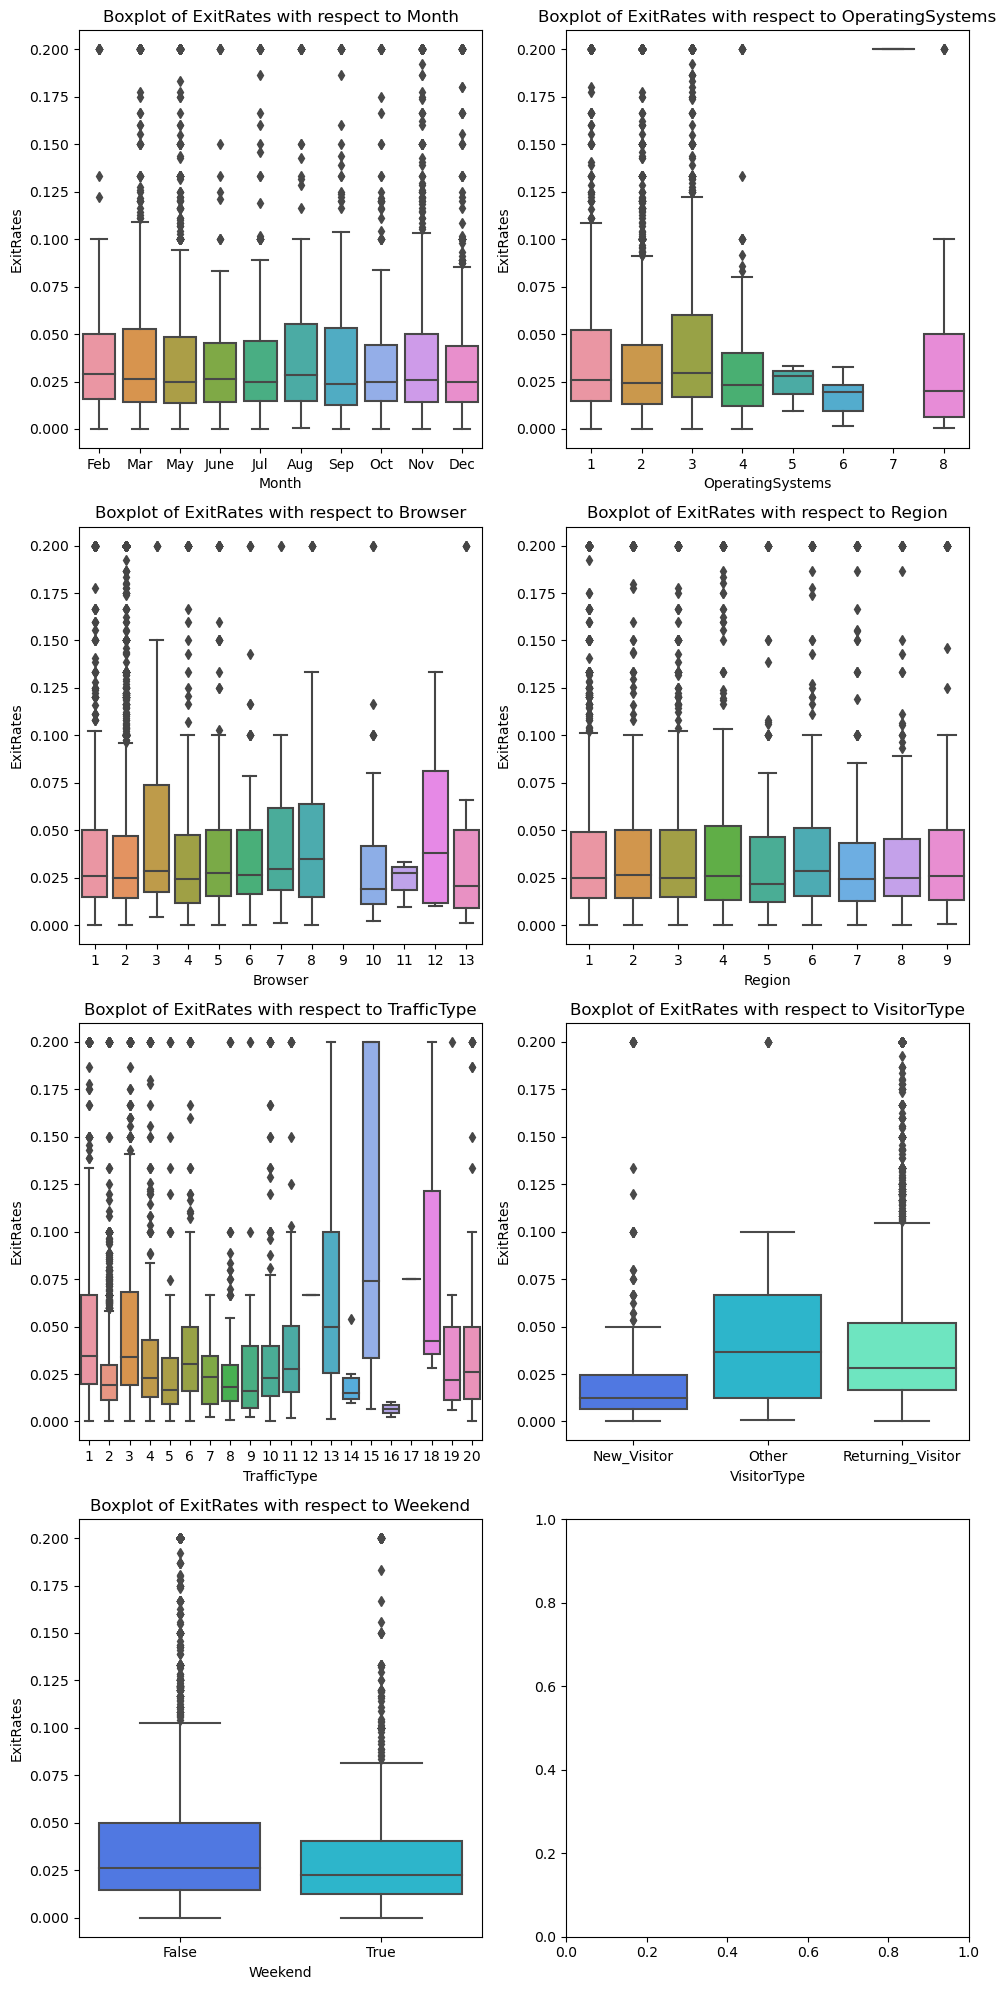

In [22]:
sns.set_palette("rainbow")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))

for cat in enumerate(df_cat2):
    i, cat = cat
    sns.boxplot(x="{}".format(cat), y="ExitRates", data=training_set, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title("Boxplot of ExitRates with respect to {}".format(cat))

plt.tight_layout()
plt.show();

Regarding numerical variables, we perform a Spearman correlation test and show the results.

In [23]:
df_num2 = df_num.drop(columns=["ExitRates"])

p_values = pd.DataFrame(columns=['Variable', 'rho', 'p-value', 'p < 0.001'])
for num in df_num2:
    corr, p = spearmanr(df_num['ExitRates'], df_num2[num])
    if p < 0.001 and abs(corr) > 0.4:
        asx = "***"
    else:
        asx = ""
    p_values = pd.concat([p_values, pd.DataFrame({'Variable': [num], 'rho': [corr], 'p-value': [p], 'p < 0.001': [asx]})], ignore_index=True)
    
p_values

,Variable,rho,p-value,p < 0.001
0,Administrative,-0.420609,1.245018e-275,***
1,Administrative_Duration,-0.425344,1.747292e-282,***
2,Informational,-0.170708,1.781219e-43,
3,Informational_Duration,-0.184810,8.896178e-51,
4,ProductRelated,-0.516527,0.000000e+00,***
5,ProductRelated_Duration,-0.472244,0.000000e+00,***
6,BounceRates,0.602104,0.000000e+00,***
7,PageValues,-0.307470,1.297023e-141,
8,SpecialDay,0.145920,4.165174e-32,


## 1.2 Variance selection

In [24]:
training_set = training_set_reg
X_train = training_set.drop(columns=['ExitRates','Revenue'])
y_train = training_set['ExitRates']

We apply variance selection to remove all the features with a very low variance.

In [25]:
threshold = 0.001
variance_selector = VarianceThreshold(threshold=threshold)

X_train = X_train.loc[:, variance_selector.fit(X_train).get_support()]
columns_remaining = X_train.columns.tolist()
print(X_train.columns.tolist())
print("Number of features: ", len(columns_remaining))

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_15', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorTyp

Plot of the histogram in order to have an idea of the distribution of the "ExitRates" variable. By looking at the plot, it seems quite asymmetrical, with peaks on the first values.

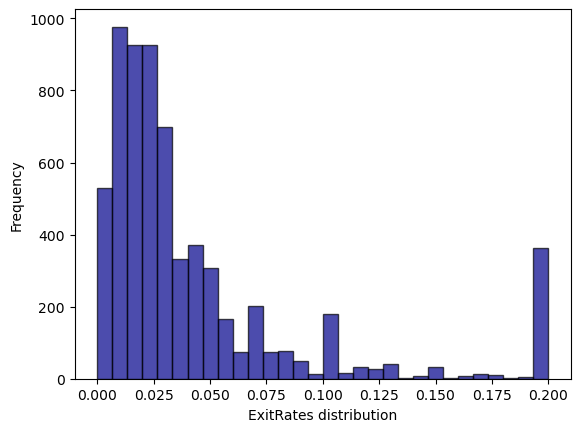

In [26]:
plot = plt.hist(np.array(y_train), bins=30, color="darkblue", edgecolor='black', alpha=0.7)

x_lab = plt.xlabel('ExitRates distribution')
y_lab = plt.ylabel('Frequency')

plt.show(plot)
plt.show(x_lab)
plt.show(y_lab)

## 1.3 Linear and polynomial regression

We check which is the best model along different degrees of polynomial regression. We find out that the best solution, considering all the variables, is the linear one (degree = 1).

In [27]:
r2_scorer = make_scorer(r2_score, greater_is_better=True)

# Validation
model = Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])

# Select parameters to optimize
parameters = {'poly__degree': list(range(1,3))}

cv = KFold(n_splits=5, random_state=42, shuffle=True)
model_cv = GridSearchCV(model, parameters, scoring=r2_scorer, cv=cv, refit=True)
model_cv.fit(X_train, y_train)
best_polynomial_model = model_cv.best_estimator_
print("Best Hyperparameters:", model_cv.best_params_)
print("Best R-squared Score:", model_cv.best_score_)

Best Hyperparameters: {'poly__degree': 1}
Best R-squared Score: 0.8609495385172083


Once assessed that the linear regression model with degree equal to 1 is the best one among different degrees, we train that model with all the varibles. Then, we will try to improve this result using Ridge, Lasso or Forward Stepwise Selection.

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

cv = KFold(n_splits=5, random_state=42, shuffle=True)
MSE = cross_val_score(lin_reg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
MSE = np.mean(-MSE)
r2_lin_reg = cross_val_score(lin_reg, X_train, y_train, cv=cv, scoring='r2')
r2_lin_reg = np.mean(r2_lin_reg)

print("Mean Squared Error:", MSE)
print("R-squared:", r2_lin_reg)

Mean Squared Error: 0.0003216844244378587
R-squared: 0.8609495385172947


Plot of the residuals for linear regression, to assess if our regression hypotheses are correct. The plot shows no particular pattern, residuals seem to be random distributed, so the assumptions are not violated.

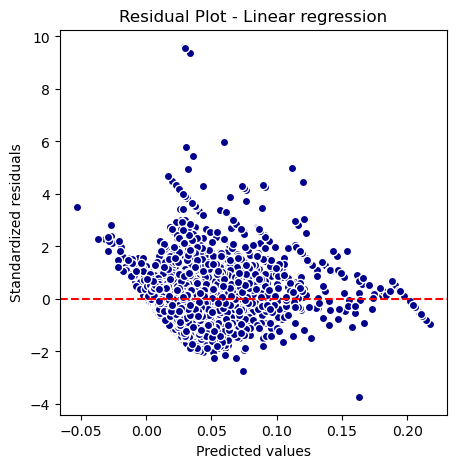

In [29]:
predicted_values = lin_reg.predict(X_train)
residuals = y_train - predicted_values
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(5, 5))
plt.scatter(predicted_values, standardized_residuals, color='darkblue', edgecolor='white')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot - Linear regression')
plt.show()

## 1.4 Improvements of linear regression

We now try to improve linear regression performance by using shrinkage methods (to improve accuracy) and feature selection (to improve interpretability).

In [30]:
scaler=StandardScaler()

# we scale the numeric features to have better results
X_train_scaled = X_train
X_train_scaled.iloc[:,list(range(0,9))] = scaler.fit_transform(X_train_scaled.iloc[:,list(range(0,9))])

### Ridge regression

The $R^2$ is almost equal to the one of the standard linear model. It is coherent, because all our coefficients are very small and Ridge regression is more appropriate when we have some high coefficients that we want to shrink near 0.

In [31]:
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0]
}

pipeline = Pipeline([
    ('ridge', Ridge())
])

cv = KFold(n_splits=5, random_state=42, shuffle=True)

grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['ridge__alpha']
best_estimator = grid_search.best_estimator_
print("Best alpha:", best_alpha)

Best alpha: 10.0


In [32]:
best_model_ridge = grid_search.best_estimator_

MSE = cross_val_score(best_model_ridge, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
MSE = np.mean(-MSE)
r2_ridge = cross_val_score(best_model_ridge, X_train_scaled, y_train, cv=cv, scoring='r2')
r2_ridge = np.mean(r2_ridge)

print("Mean Squared Error:", MSE)
print("R-squared:", r2_ridge)

Mean Squared Error: 0.0003212346185581315
R-squared: 0.8611378313812716


Plot of the residuals for linear regression with Ridge, to assess if our regression hypotheses are correct. The plot shows no particular pattern, residuals seem to be random distributed, so the assumptions are not violated.

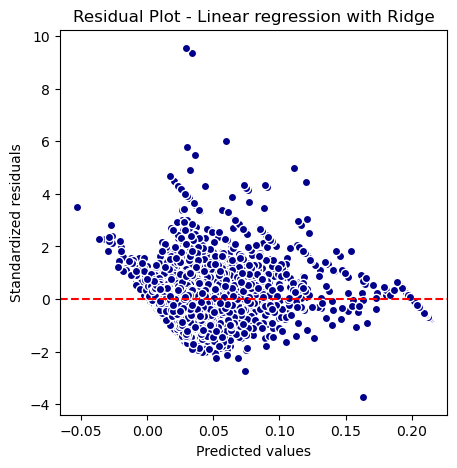

In [33]:
predicted_values = best_model_ridge.predict(X_train_scaled)
residuals = y_train - predicted_values
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(5, 5))
plt.scatter(predicted_values, standardized_residuals, color='darkblue', edgecolor='white')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot - Linear regression with Ridge')
plt.show()

### Lasso

In [34]:
param_grid = {
    'lasso__alpha': [0.0005, 0.001, 0.01, 0.1, 1.0, 10.0] 
}

pipeline = Pipeline([
    ('lasso', Lasso())
])

cv = KFold(n_splits=5, random_state=42, shuffle=True)

grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['lasso__alpha']
best_estimator = grid_search.best_estimator_
print("Best alpha:", best_alpha)

Best alpha: 0.0005


In [35]:
best_model_lasso = grid_search.best_estimator_

MSE = cross_val_score(best_model_lasso, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
MSE = np.mean(-MSE)
r2_lasso = cross_val_score(best_model_lasso, X_train_scaled, y_train, cv=cv, scoring='r2')
r2_lasso = np.mean(r2_lasso)

print("Mean Squared Error:", MSE)
print("R-squared:", r2_lasso)

print("Number of features maintained:", np.count_nonzero(np.array(best_estimator.named_steps['lasso'].coef_)))

non_zero_coeffs = best_model_lasso.named_steps['lasso'].coef_ != 0
features = X_train.columns[non_zero_coeffs]

print("Features maintained:", features)

Mean Squared Error: 0.0003277673456211589
R-squared: 0.8583211625837895
Number of features maintained: 9
Features maintained: Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'BounceRates', 'PageValues', 'SpecialDay', 'OperatingSystems_2',
       'TrafficType_2', 'VisitorType_New_Visitor'],
      dtype='object')


Plot of the residuals for linear regression with Lasso, to assess if our regression hypotheses are correct. The plot shows no particular pattern, residuals seem to be random distributed, so the assumptions are not violated.

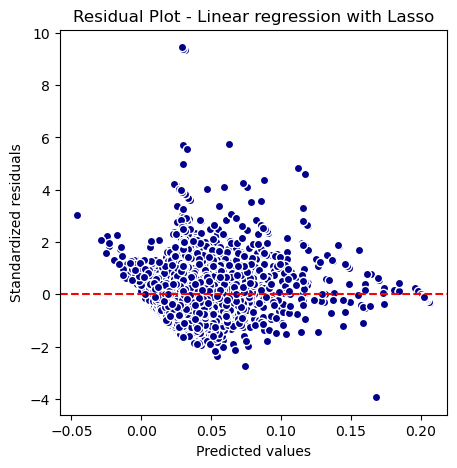

In [36]:
predicted_values = best_model_lasso.predict(X_train_scaled)
residuals = y_train - predicted_values
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(5, 5))
plt.scatter(predicted_values, standardized_residuals, color='darkblue', edgecolor='white')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot - Linear regression with Lasso')
plt.show()

### Linear regression vs linear regression with Ridge and Lasso

To perform an accurate evaluation of the models we compute the RMSE throug 5-cv. Results are very similar. So, Ridge is useless, while maybe we can consider Lasso because it gives the same results of simple linear regression, but it performs feature selection, keeping only 16 features.

In [37]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Linear Regression
linear_reg_score = cross_val_score(lin_reg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
linear_reg_rmse = np.sqrt(-linear_reg_score.mean())

# Ridge Regression
ridge_reg_score = cross_val_score(best_model_ridge, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
ridge_reg_rmse = np.sqrt(-ridge_reg_score.mean())

# Lasso Regression
lasso_reg_score = cross_val_score(best_model_lasso, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
lasso_reg_rmse = np.sqrt(-lasso_reg_score.mean())

# Evaluation
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
rmse_scores = [linear_reg_rmse, ridge_reg_rmse, lasso_reg_rmse]

for model, rmse_score in zip(models, rmse_scores):
    print(f"{model}: RMSE = {rmse_score}")

Linear Regression: RMSE = 0.018009976891742566
Ridge Regression: RMSE = 0.01792301923667247
Lasso Regression: RMSE = 0.01810434604235013


### Forward stepwise selection

We now perform forward stepwise selection with cross validation on the simple linear regression model.

In [38]:
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator


possible_models = {
    "LogisticRegression":LogisticRegression(solver="newton-cg", penalty='none',max_iter=1000),
    "LDA":LDA(),
    "QDA":QDA(),
    #"KNN":KNeighborsClassifier(n_neighbors=6),
    "LinearRegression":LinearRegression(fit_intercept=True),
}

#da qui inizia il ctrl Z

def forward_selection(Xtrain_pd, ytrain, model_chosen,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    
    
    for dim in range(num_features):
        candidate_metrics = [] # metrics for all the models with dim features
        candidate_models = []  # models with dim features
        
        remaining_features = all_features.difference(selected_features)
        
        # fit all the models with k features
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = possible_models[model_chosen]
            #print(new_column)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        
        idx_best_candidate = candidates_argbest(candidate_metrics) # select the best Mk model
        selected_features.append(remaining_features[idx_best_candidate]) # Update selected feature
        best_candidate_metric.append(candidate_metrics[idx_best_candidate]) # Save best candidate features
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for the final step -> comparison of all the best models
        best_subset_model = candidate_models[idx_best_candidate] # save the best model
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score) #computing the metrics for the training set
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim+1, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim+1, score))
        
    # choose the best candidates
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n Best configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    return best_features

In [39]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
features_lin_reg = forward_selection(X_train, y_train, "LinearRegression",
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(r2_score), cv), np.argmax, # 3.
                  candidates_scorer_name="R^2",
                  subsets_scorer_name="R^2 (CV)",
                  verbose=False, weight_step3=cv.n_splits)
print("The best model has {} features".format(len(features_lin_reg)))
features_lin_reg

The best model has 22 features


['BounceRates',
 'Administrative',
 'ProductRelated',
 'VisitorType_New_Visitor',
 'PageValues',
 'TrafficType_2',
 'OperatingSystems_2',
 'SpecialDay',
 'TrafficType_4',
 'Month_June',
 'OperatingSystems_3',
 'TrafficType_3',
 'TrafficType_13',
 'TrafficType_1',
 'Month_Dec',
 'Region_7',
 'TrafficType_19',
 'VisitorType_Other',
 'Browser_13',
 'ProductRelated_Duration',
 'OperatingSystems_6',
 'Region_9']

In [40]:
best_model_forward = LinearRegression(fit_intercept=True)
best_model_forward = best_model_forward.fit(X_train[features_lin_reg],y_train)

MSE = cross_val_score(best_model_forward, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
MSE = np.mean(-MSE)
r2_forward = cross_val_score(best_model_forward, X_train_scaled, y_train, cv=cv, scoring='r2')
r2_forward = np.mean(r2_forward)

print("Mean Squared Error:", MSE)
print("R-squared:", r2_forward)

Mean Squared Error: 0.00032435926764110115
R-squared: 0.8597792551540218


Plot of the residuals for linear regression with forward stepwise selection, to assess if our regression hypotheses are correct. The plot shows no particular pattern, residuals seem to be random distributed, so the assumptions are not violated.

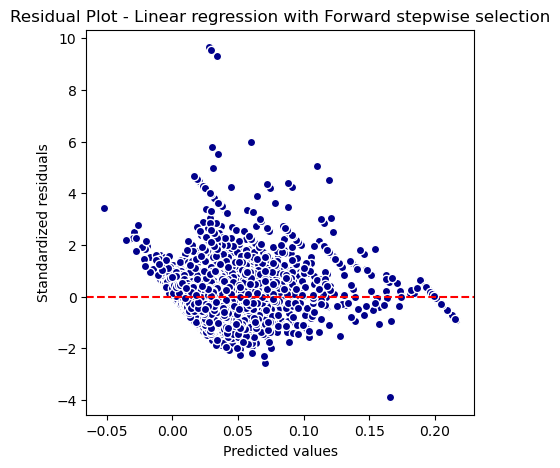

In [41]:
predicted_values = best_model_forward.predict(X_train[features_lin_reg])
residuals = y_train - predicted_values
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(5, 5))
plt.scatter(predicted_values, standardized_residuals, color='darkblue', edgecolor='white')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot - Linear regression with Forward stepwise selection')
plt.show()

## 1.5 KNN algorithm

We now repeat the analysis using a different method, the K-Nearest Neighbors. This algorithm has problems when the dimension of the dataset is too high (curse of dimensionality), so we use it involving only the 9 numerical variables.

In [42]:
X_train_num = df_num.drop(columns='ExitRates')
y_train_num = df_num['ExitRates']

X_train_num_scaled = scaler.fit_transform(X_train_num)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)

cv = KFold(n_splits=5, random_state=42, shuffle=True)

params = {'n_neighbors': range(1, 30)}

KNR = KNeighborsRegressor()
KNR_cv = GridSearchCV(KNR, params, refit=True, cv=cv, scoring='r2')
KNR_cv.fit(X_train_num, y_train)
print("Best number of neighbours: {}".format(KNR_cv.best_params_['n_neighbors']))

knn_regressor = KNeighborsRegressor(n_neighbors=KNR_cv.best_params_['n_neighbors'])
r2_KNN = cross_val_score(knn_regressor, X_train_num, y_train_num, cv=cv, scoring='r2')
mean_r2_KNN = r2_KNN.mean()
print("R^2:", mean_r2_KNN)

Best number of neighbours: 11
R^2: 0.7657364695918126


Plot of the residuals for linear regression with Lasso, to assess if our regression hypotheses are correct. The plot shows no particular pattern, residuals seem to be random distributed, so the assumptions are not violated.

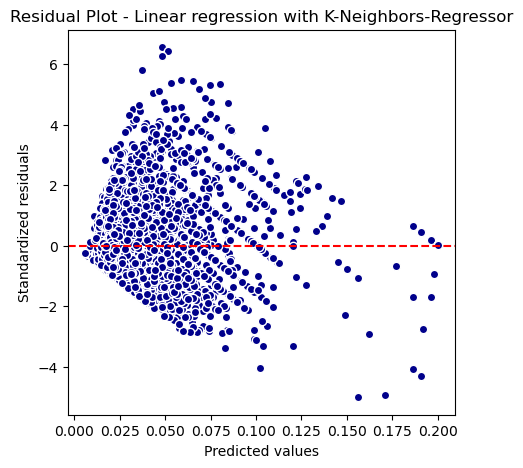

In [44]:
knn_regressor = knn_regressor.fit(X_train_num,y_train)
predicted_values = knn_regressor.predict(X_train_num)
residuals = y_train - predicted_values
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(5, 5))
plt.scatter(predicted_values, standardized_residuals, color='darkblue', edgecolor='white')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot - Linear regression with K-Neighbors-Regressor')
plt.show()

## 1.6 Model comparison

Sono tutti uguali tranne KNN che è più basso. Escludiamo KNN perchè ha problemi sull'alta dimensionalità ecc. Tra tutti gli altri modelli, che hanno praticamente lo stesso errore, decidiamo di usare lasso o forward perchè tengono meno variabili e danno gli stessi risultati. Alla fine scegliamo ... perchè ...

In [45]:
print("R^2 for linear regression: {}".format(r2_lin_reg))
print("R^2 for linear regression with Ridge: {}".format(r2_ridge))
print("R^2 for linear regression with Lasso: {}".format(r2_lasso))
print("R^2 for linear regression with forward stepwise selection: {}".format(r2_forward))
print("R^2 for KNN: {}".format(mean_r2_KNN))

R^2 for linear regression: 0.8609495385172947
R^2 for linear regression with Ridge: 0.8611378313812716
R^2 for linear regression with Lasso: 0.8583211625837895
R^2 for linear regression with forward stepwise selection: 0.8597792551540218
R^2 for KNN: 0.7657364695918126


## 1.7 Filling missing values

Reimportiamo il dataset in modo che sia completo e quindi ci siano anche i valori con exitrates = nan, in modo da poterli "riempire" con le nostre previsioni. We create dummy variables to treat categorical variables in a regression setting and we uniform the categories between training and test set. Spiegare la questione per cui nel train ci sono categorie che non ci sono nel test e viceversa

Qui aggiungerei un commento su quello che stiamo andando a fare, ovvero riempire i valori di exitrates che erano vuoti / nan con i valori predetti dal nostro best regression model.

In [46]:
X_missing = missing_values[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_15', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']]
values = best_model_lasso.predict(X_missing)
values = np.where(values < 0, 0, values)
values = np.where(values > 1, 1, values)
training_set_complete.loc[:,'ExitRates'] = training_set_complete.loc[:,'ExitRates'].fillna(pd.Series(values,missing_values.index))
training_set_complete

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.000000,0,0.0,5,19.000000,0.000000,0.080000,0.000000,0.6,...,0,0,0,0,0,0,0,1,1,0
1,5,158.700000,0,0.0,51,1364.266667,0.007692,0.011987,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,1
2,7,87.916667,1,0.0,46,1621.025379,0.004082,0.020544,6.023523,0.0,...,0,0,0,0,0,0,0,1,1,0
3,1,4.000000,0,0.0,37,1296.942857,0.013889,0.000000,0.000000,0.8,...,0,0,0,0,0,0,0,1,1,0
4,2,132.400000,0,0.0,11,296.300000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9243,10,130.550000,1,23.2,7,128.233333,0.006667,0.015238,0.000000,0.0,...,0,0,0,0,0,1,0,0,1,0
9244,14,260.736111,3,186.5,51,2921.902778,0.013661,0.029891,8.339172,0.0,...,0,0,0,0,0,0,0,1,0,1
9245,7,109.500000,0,0.0,25,349.696970,0.000000,0.019048,0.000000,0.0,...,0,0,0,0,0,0,0,1,1,0
9246,4,82.700000,0,0.0,26,405.283333,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,1,0,0,1,0


In [47]:
test_set = pd.read_csv("data/training_set_online_shoppers_intention.csv")
test_set = test_set.drop(columns=['Unnamed: 0'])

test_set['Month']=test_set['Month'].astype('category')
test_set['OperatingSystems']=test_set['OperatingSystems'].astype('category')
test_set['Browser']=test_set['Browser'].astype('category')
test_set['Region']=test_set['Region'].astype('category')
test_set['TrafficType']=test_set['TrafficType'].astype('category')
test_set['VisitorType']=test_set['VisitorType'].astype('category')
test_set['Weekend']=test_set['Weekend'].astype('category')
test_set['Revenue']=test_set['Revenue'].astype('category')

In [49]:
test_set['Browser'] = test_set['Browser'].cat.set_categories(all_categories_browser)
test_set['TrafficType'] = test_set['TrafficType'].cat.set_categories(all_categories_traffic_type)

test_set = pd.get_dummies(test_set, columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend'], drop_first=False)

In [50]:
missing_values_test = test_set[test_set['ExitRates'].isna()]
X_missing_test = missing_values_test[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_15', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']]
values_test = best_model_lasso.predict(X_missing_test)
values_test = np.where(values_test < 0, 0, values_test)
values_test = np.where(values_test > 1, 1, values_test)
test_set.loc[:,'ExitRates'] = test_set.loc[:,'ExitRates'].fillna(pd.Series(values_test,missing_values_test.index))
test_set

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.000000,0,0.0,5,19.000000,0.000000,0.080000,0.000000,0.6,...,0,0,0,0,0,0,0,1,1,0
1,5,158.700000,0,0.0,51,1364.266667,0.007692,0.011987,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,1
2,7,87.916667,1,0.0,46,1621.025379,0.004082,0.020544,6.023523,0.0,...,0,0,0,0,0,0,0,1,1,0
3,1,4.000000,0,0.0,37,1296.942857,0.013889,0.000000,0.000000,0.8,...,0,0,0,0,0,0,0,1,1,0
4,2,132.400000,0,0.0,11,296.300000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9243,10,130.550000,1,23.2,7,128.233333,0.006667,0.015238,0.000000,0.0,...,0,0,0,0,0,1,0,0,1,0
9244,14,260.736111,3,186.5,51,2921.902778,0.013661,0.029891,8.339172,0.0,...,0,0,0,0,0,0,0,1,0,1
9245,7,109.500000,0,0.0,25,349.696970,0.000000,0.019048,0.000000,0.0,...,0,0,0,0,0,0,0,1,1,0
9246,4,82.700000,0,0.0,26,405.283333,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,1,0,0,1,0


In [54]:
training_set_complete.to_csv("training_set_complete.csv", index=False)
test_set.to_csv("test_set_complete.csv", index=False)